# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [7]:
# your answer here
employee = pd.read_csv('Employee.csv')
employee


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [8]:
# your answer here-1st way
employee.groupby(['Department']).agg({'Salary':'mean'})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [9]:
# your answer here-2nd way
employee.pivot_table(index = ["Department"],
                     values = ["Salary"],
                     aggfunc = np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [11]:
# your answer here
employee.pivot_table(index = ["Department","Title"],
                     values = ["Salary"],
                     aggfunc = np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [14]:
# your answer here
employee.pivot_table(index = ["Title"],
                     values = ["Salary"],
                     columns = ["Years"])

Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [33]:
# your answer here
employee.pivot_table(index = ["Department", "Title"],
                     values = ["Salary"],
                     aggfunc = {"Salary":np.mean, "Department":len})

Department  Salary
Department Title                        
HR         VP                  1    70.0
           analyst             2    32.5
IT         VP                  1    70.0
           analyst             2    32.5
           associate           1    60.0
Sales      associate           2    55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [38]:
# your answer here

""" We can appreciate that all VP employees in HR and IT department earn the same, 
we can observe the same but in an associate level in IT and Sales department,
where employees earn the same, because we can consider NaN as zero."""

employee.pivot_table(index = ["Department", "Title"],
                     values = ["Salary"],
                     aggfunc = [np.median, np.min, np.max, np.std])

median   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [41]:
# your answer here
employee.pivot_table(index = ["Department", "Title"],
                     values = ["Salary"],
                     aggfunc = [np.median, np.min, np.max, np.std],
                     fill_value = 0)

median   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [59]:
# your answer here
money_spend=employee.pivot_table(index = ["Department"],
                     values = ["Salary"],
                     aggfunc = {"Department":len, "Salary":np.sum})
total = money_spend["Salary"].sum()
print(money_spend)
print(f'The company spends {total}')

            Department  Salary
Department                    
HR                   3     135
IT                   4     195
Sales                2     110
The company spends 440


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [64]:
# your answer here
employee.pivot_table(index = ["Department", "Title"],
                     values = ["Years", "Salary"],
                     aggfunc = {"Years":np.sum, "Salary":np.mean})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
# your answer here--Your custom function here
        

In [13]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [66]:
# your answer here
fitbit = pd.read_csv('Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [112]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [77]:
# your answer here
fitbit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000,2974.00,3233.00,4351.00
Steps,367.0,10121.588556,5594.836225,0.000,6730.500,10413.00,13916.50,26444.00
Distance,367.0,8.549128,3.409881,0.000,6.155,8.29,10.56,20.45
Floors,367.0,11.724796,10.337370,0.000,5.000,11.00,16.00,101.00
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000,24.00,41.50,101.00
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500,29.00,54.00,153.00
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000,337.00,400.50,553.00


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [79]:
# your answer here
fitbit[['Minutes Very Active','Steps']].corr()
#It is a positive correlation, which mean the more steps, 
#the more minutes very active though it is not that strong

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [80]:
import matplotlib.pyplot as plt

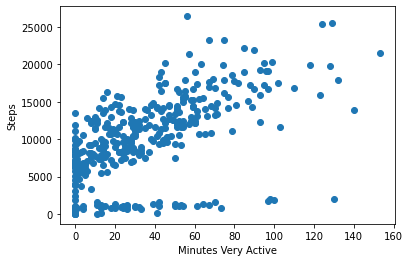

In [83]:
# your answer here
plt.scatter(x = fitbit['Minutes Very Active'], y = fitbit['Steps'])
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps');

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here
"""It is a positive correlation, which mean the more steps, the more minutes very active.
We can observe that there are values in cero which means we might have to discard those values,
and we can appreciate that there are times where the statement is not true,
because we can observe cases where the steps are likely to be the same with 20 or 100 minutes very active.
It is not a linear correlation.
"""

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [84]:
# your answer here
fitbit[['Minutes Sedentary','Steps']].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

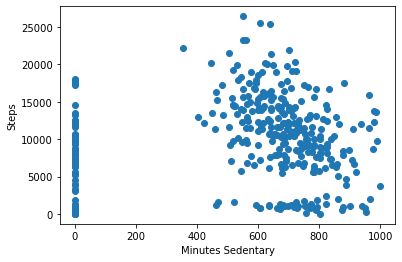

In [85]:
# your answer here
plt.scatter(x = fitbit['Minutes Sedentary'], y = fitbit['Steps'])
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps');

In [22]:
# Your comment here
"""We can appreciate that the less minutes sedentary, the more steps we can observed.
This means that correlation is negative.
The values in cero, might have values in minutes active.
It is not a linear correlation.
"""

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [86]:
# your answer here
fitbit[['MinutesOfSleep','Steps']].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

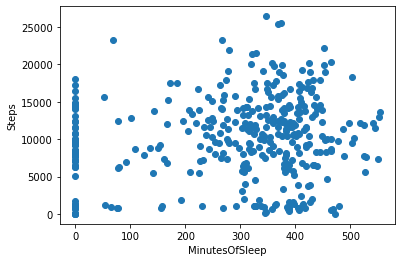

In [87]:
# your answer here
plt.scatter(x = fitbit['MinutesOfSleep'], y = fitbit['Steps'])
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps');

In [ ]:
"""The less minutes of sleep, the more steps we can observed.
But correlation is not linear.
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [89]:
# your answer here
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[column]

In [90]:
#Print cor_fit
cor_fit.corr()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [96]:
# your answer here
cor_fit.corr()['Steps'].sort_values(ascending=False)
# Minutes very active is the highest correlated feature

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [97]:
# your answer here
time_grades = pd.read_csv('Time_Grades.csv')

In [102]:
#Print time_grades
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

TypeError: 'value' must be an instance of str or bytes, not a int

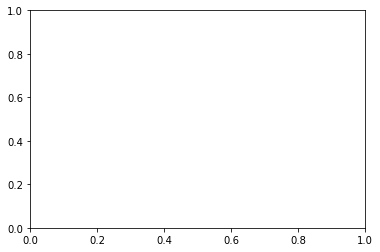

In [117]:
# your answer here
plt.hist(x = time_grades);
#Tuve error al graficar, no supe por qué

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [110]:
# your answer here-Pearson 
time_grades[['Study time', 'Grade']].corr()

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [111]:
## your answer here-Spearman
time_grades[['Study time', 'Grade']].corr('spearman')

#Spearman correlation is greater that Pearson

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

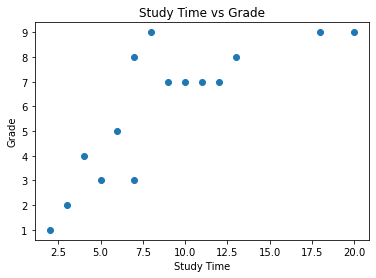

In [116]:
# your answer here
plt.title('Study Time vs Grade')
plt.xlabel('Study Time')
plt.ylabel('Grade')
plt.scatter(x = time_grades['Study time'], y = time_grades['Grade']);

In [118]:
#your comment here
#It is a positive correlation, which means the more study time, the better grades


#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here
"""
Pearson correlation it is used when variables are normally distributed, values have a linear relationship.
Spearman correlation is preferred when there is a monotonic relationship.


"""